# Создание признаков

Проектирование признаков — самый творческий процесс во всём цикле жизни создания модели машинного обучения. 

Он включает в себя несколько этапов: 

1) создание признаков;
2) преобразование признаков;
3) отбор признаков.

В данном модуле мы подробно познакомимся с **каждым** из этапов проектирования признаков. Этот юнит будет посвящён процессу **создания признаков**.

Создание признаков, feature extraction, часто именуемое генерацией признаков, — творческий процесс извлечения новых признаков путём создания признаков из существующего набора данных или путём использования дополнительной информации. 

Проектирование признаков необходимо для улучшения качества будущей модели: в процессе создания признаков появляются новые, возможно, более качественные, чем исходные.

Новые признаки могут быть сконструированы двумя способами: 

1) с помощью внешних источников данных;
2) из существующего набора данных.

**Пример 1**

``В колл-центрах часто используются системы автоматического подбора номеров для дозвона (рекомендация). Если клиент во время прошлого созвона сбросил трубку, то автоматическая система должна снижать рекомендацию этого номера. Клиент вряд ли ответит после того, как бросил трубку.`` 

В выделении этого факта нам поможет создание нового признака «сброс трубки» из информации в существующем датасете. Эта информация может быть получена из уже существующих признаков, например если время звонка составило меньше 10 секунд.

**Пример 2**

``Для определения дефолтности клиента банки делают запрос в БКИ с целью получения дополнительной информации по клиенту. ``

Такая информация о невыплаченных долгах другим организациям может быть решающим фактором в вынесении решения по кредиту. Эту информацию можно получить с использованием внешних источников данных.



Новые признаки можно сконструировать из уже существующего набора данных несколькими способами: 

1) разбор категорий; 
2) разбор даты и времени;
3) разбор числовых признаков;
4) разбор текста.

Рассмотрим эти способы на примере задачи винных обзоров. Вспомним задачу винного сомелье — научиться определять рейтинг (качество) вина по его различным характеристикам. В этом модуле для практических заданий мы будем пользоваться подготовленным и очищенным датасетом.

## РАЗБОР ДАТЫ И ВРЕМЕНИ

In [15]:
import numpy as np 
import pandas as pd 
import plotly.express as px

In [16]:
wine_data = pd.read_csv('data/wine_cleared.csv')
wine_data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


Признаки, обозначающие дату и время, могут содержать много полезной информации. 

Например, в нашем датасете в названии вина можно увидеть год производства вина. Этот признак может оказаться важным для определения рейтинга вина. Однако, пока он заключен в названии вина, модель не сможет его использовать.

Можно выделить год, месяц и часы в отдельные признаки: время суток, времена года и так далее. И если вы считаете, что ваш процесс зависит от времени, посвятите этому этапу как можно больше усилий.

## РАЗБОР ЧИСЛОВЫХ ВЕЛИЧИН

В наборе данных очень часто встречаются числовые величины. Это могут быть вес, рост, расстояние и так далее. Вы можете преобразовывать их, создавать новые признаки, которые могут оказаться лучше исходных.

Например, в датасете винных обзоров числовым признаком является цена за бутылку вина. Вы можете округлить цену 35.363389$ в 35$, избавив данные от лишней информации.

✍️ Создадим новый признак price_round, означающий округлённую до целого числа цену за бутылку вина:

In [17]:
# для удобства сразу преобразуем признак в int
wine_data['price_round'] = wine_data['price'].round().astype(int)
wine_data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14


Для таких преобразований важен контекст. В контексте вина для сомелье цена в 35$ и 35.363389$ одинакова. Вы делаете округление признака, чтобы модель также не сосредотачивалась на сотых. Это может помочь улучшить предсказание.

``Однако такое преобразование неуместно в ситуациях, когда сотые важны. Например, при предсказании курса лиры стоимость валюты в 6.12 руб. и в 6.84 руб. — абсолютно разные ситуации. ``

Помимо округления для создания новых признаков могут применяться такие популярные операции, как логарифмирование числового признака или извлечение его корня. Это подразумевает создание признаков в наиболее удобной форме для обучения модели. О необходимости таких преобразований вы узнаете далее в юните преобразования данных.

## РАЗБОР ТЕКСТА

Текстовые признаки могут содержать в себе большое количество информации. Например, если бы наша модель умела распознавать текст, то из описания вина мы бы могли понять, какими словами сомелье чаще характеризуют качественное вино. Вы можете воспользоваться методами извлечения слов из текста, чтобы получить новые признаки.

В названии вина вы можете заметить указание года произведения вина. Чтобы узнать, влияет ли год на рейтинг вина, вам необходимо выделить год в отдельный признак.

Для того, чтобы извлечь из строки число, обозначающее год, необходимо воспользоваться регулярными выражениями.

Регулярные выражения (regexp, или regex) — это механизм для поиска и замены текста. Это шаблоны, которые используются для поиска соответствующей части текста.

Например, с помощью такого регулярного выражения ``[^@ \t\r\n]+@[^@ \t\r\n]+\.[^@ \t\r\n]+`` можно найти любой email в тексте.

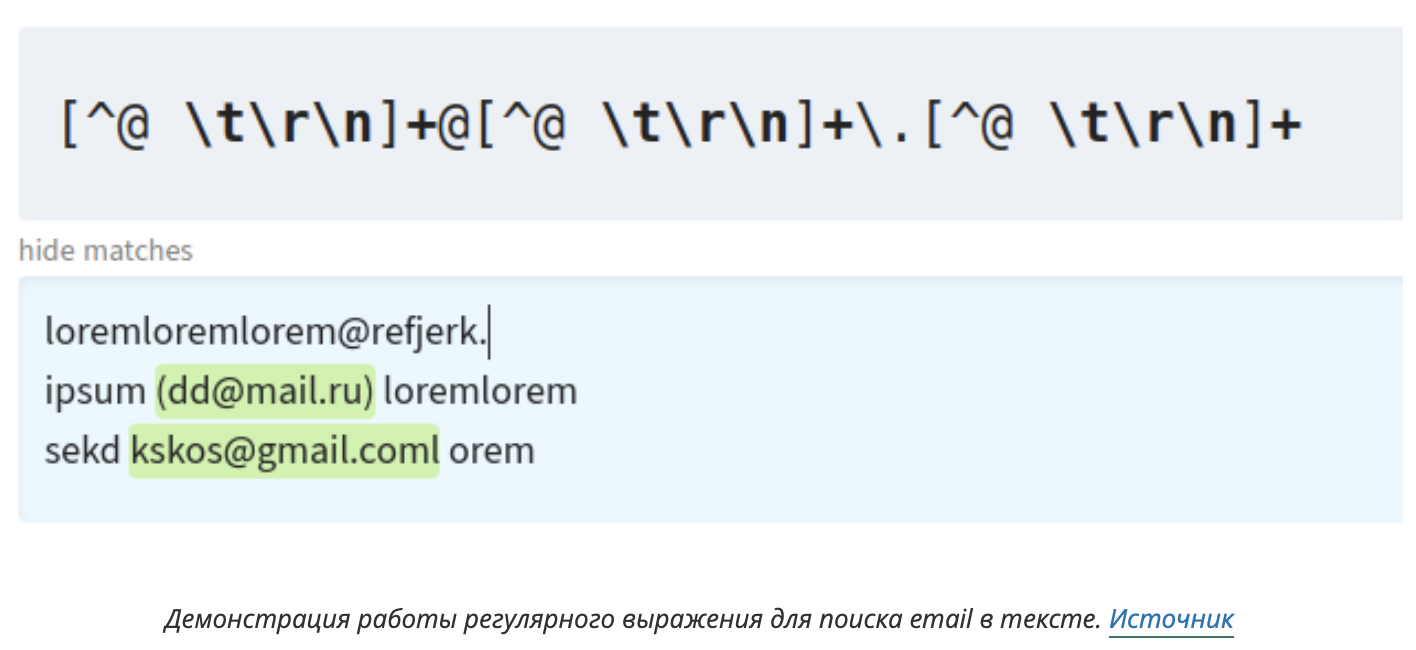

Синтаксис регулярных выражений необычен и содержит различные символы, знаки препинания, математических операций и так далее. Подробнее ознакомиться с синтаксисом регулярных выражений поможет статья Python RegEx: практическое применение регулярок.

Реализация такого механизма существует в pandas в работе со строками. Для того чтобы найти все числа в каждом значении серии, воспользуемся методом str.findall(). Метод возвращает все совпадения с заданным шаблоном в серии pandas. 

✍️ Выполните код для нахождения года вина при помощи регулярного выражения:

In [18]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
wine_data['year'] = wine_data['title'].str.findall(regex).str.get(0)

Разберём регулярное выражение \d{4}:

\d — класс символов, обозначает соответствие цифрам в диапазоне цифр [0-9];
{4} в шаблоне означает искать четыре вхождения символа, указанного ранее. В нашем случае это будут четырехзначные числа.
Таким образом, \d{4} означает поиск четырехзначных чисел в заданной строке.

Проверить, насколько точно работает ваше регулярное выражение, а также найти реализацию популярных регулярных выражений (например, поиска номера телефона), вы сможете на сайте https://ihateregex.io.

Однако при поиске числа методом data['title'].str.findall(regex) результатом выполнения является список найденных цифр. Поэтому необходимо извлечь первый элемент из списка найденных методом str.get(0), где 0 — первый элемент в списке найденных чисел.

In [19]:
wine_data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013


Используя методы работы со строками pandas и регулярные выражения, можно извлечь любую информацию для новых признаков: даты, слова и выражения.